In [1]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
import numpy as np

In [26]:
def vectorize_sequences (sequences, dimension=10000):
    
# Création d'une matrice ne contenant que des zéros et de la forme
# (Len (sequences), dimension)
    results = np.zeros((len(sequences), dimension))

# Initialisation à 1 des valeurs correspondantes aux indices spécifiques de results [i]
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1. 
    return results
    
# Vectorisation des données d'apprentissage 
x_train = vectorize_sequences(train_data)

# Vectorisation des données de test
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Transofrmer étiquettes en vecteurs
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels) .astype ('float32')

In [11]:
# Définition du modèle 
from keras import models 
from keras import layers
model = models. Sequential()
model.add(layers. Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers. Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/ayoub/miniforge3/envs/keras/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics= ['accuracy'])

In [17]:
# Création d'un ensemble de validation
x_val = x_train[:10000] 
partial_x_train = x_train[10000:]

y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [18]:
# Train modèle 

model.compile (optimizer='rmsprop',
               loss='binary_crossentropy', 
               metrics=['acc'])

history = model.fit (partial_x_train, 
                     partial_y_train,
                     epochs=20,
                     batch_size=512, 
                     validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7107 - loss: 0.6001 - val_acc: 0.8486 - val_loss: 0.4218
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8885 - loss: 0.3498 - val_acc: 0.8830 - val_loss: 0.3179
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9151 - loss: 0.2608 - val_acc: 0.8828 - val_loss: 0.2996
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9336 - loss: 0.2041 - val_acc: 0.8882 - val_loss: 0.2761
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9474 - loss: 0.1674 - val_acc: 0.8612 - val_loss: 0.3456
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9536 - loss: 0.1535 - val_acc: 0.8702 - val_loss: 0.3280
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9607 - loss: 0.1296 - val_acc: 0.8851 - val_loss: 0.2965
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9665 - loss: 0.1093 - val_acc: 0.8855 - val_loss: 0.3034
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9775 - loss:

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

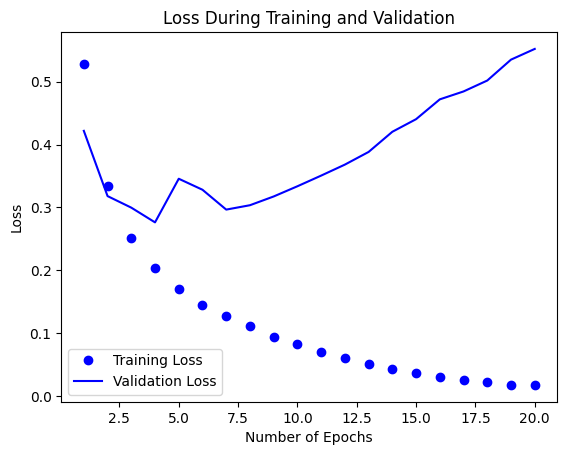

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
acc_values = history_dict['acc']  

epochs = range(1, len(acc_values) + 1)  # Use acc_values for epoch length

# 'bo' corresponds to 'blue dot'
plt.plot(epochs, loss_values, 'bo', label='Training Loss')

# 'b' corresponds to 'solid blue line'
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')

plt.title('Loss During Training and Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


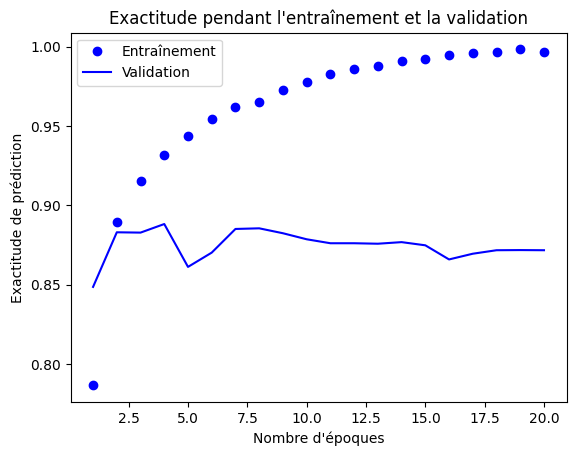

In [22]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Entraînement')  # Use acc_values here
plt.plot(epochs, val_acc_values, 'b', label='Validation')  # Use val_acc_values here
plt.title('Exactitude pendant l\'entraînement et la validation')
plt.xlabel('Nombre d\'époques')
plt.ylabel('Exactitude de prédiction')
plt.legend()

plt.show()


In [23]:
model = models.Sequential ()
model.add(layers. Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers. Dense(16, activation='relu'))
model.add(layers. Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)

/Users/ayoub/miniforge3/envs/keras/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7268 - loss: 0.5733
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9004 - loss: 0.3026
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9241 - loss: 0.2212
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9327 - loss: 0.1913
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.8845 - loss: 0.2842


In [24]:
results

[0.28411126136779785, 0.8858399987220764]

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


array([[0.21690387],
       [0.9995116 ],
       [0.7498164 ],
       ...,
       [0.11813246],
       [0.0652623 ],
       [0.4945497 ]], dtype=float32)